<a href="https://colab.research.google.com/github/aayushh04/dlt/blob/main/week_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf

# Load cats_vs_dogs dataset from TFDS
(ds_train, ds_val), ds_info = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:]'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)

# Preprocessing function
IMG_SIZE = 150

def format_image(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = image / 255.0  # normalize to [0,1]
    return image, label

ds_train = ds_train.map(format_image).batch(32).prefetch(tf.data.AUTOTUNE)
ds_val = ds_val.map(format_image).batch(32).prefetch(tf.data.AUTOTUNE)

# Define model as before
def build_cat_dog_cnn(input_shape=(IMG_SIZE, IMG_SIZE, 3)):
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

model = build_cat_dog_cnn()

# Train
history = model.fit(ds_train,
                    epochs=10,
                    validation_data=ds_val)

model.save('cat_dog_classifier_tfds.h5')

print("Training complete and model saved!")


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.JKTQII_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 38s 53ms/step - accuracy: 0.6017 - loss: 0.6940 - val_accuracy: 0.7586 - val_loss: 0.4987
Epoch 2/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 34s 58ms/step - accuracy: 0.7416 - loss: 0.5227 - val_accuracy: 0.7736 - val_loss: 0.4658
Epoch 3/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 27s 47ms/step - accuracy: 0.7931 - loss: 0.4431 - val_accuracy: 0.8063 - val_loss: 0.4172
Epoch 4/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 46s 56ms/step - accuracy: 0.8372 - loss: 0.3602 - val_accuracy: 0.8227 - val_loss: 0.4079
Epoch 5/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 27s 46ms/step - accuracy: 0.8829 - loss: 0.2748 - val_accuracy: 0.8177 - val_loss: 0.4683
Epoch 6/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 28s 47ms/step - accuracy: 0.9197 - loss: 0.1977 - val_accuracy: 0.8147 - val_loss: 0.5408
Epoch 7/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 28s 48ms/step - accuracy: 0.9457 - loss: 0.1405 - val_accuracy: 0.7934 - val_loss: 0.7452
Epoch 8/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 27s 47ms/step - accuracy: 0.9591 - loss: 0.1068 - 

Training complete and model saved!


AttributeError: module 'matplotlib.pyplot' has no attribute 'x'

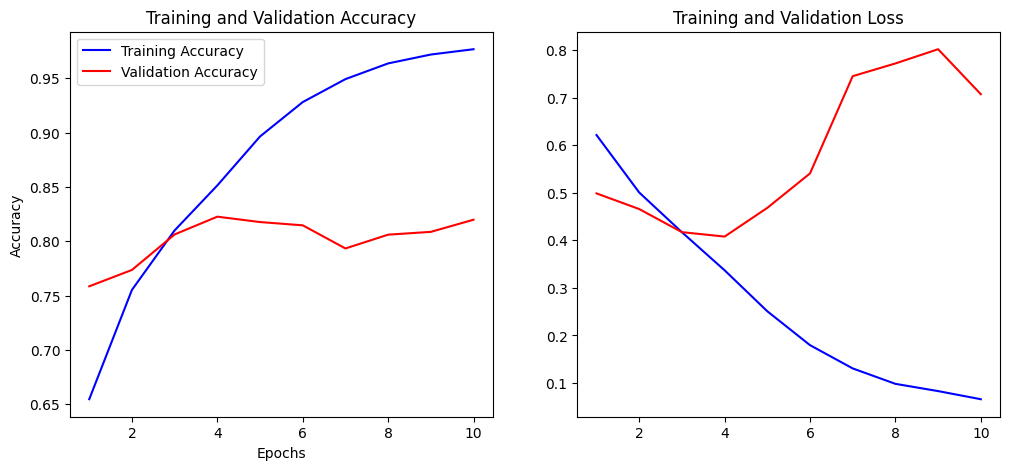

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have the history object from model.fit()
# For example: history = model.fit(...)

# Extract accuracy and loss for training and validation
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_acc) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, 'b-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.x


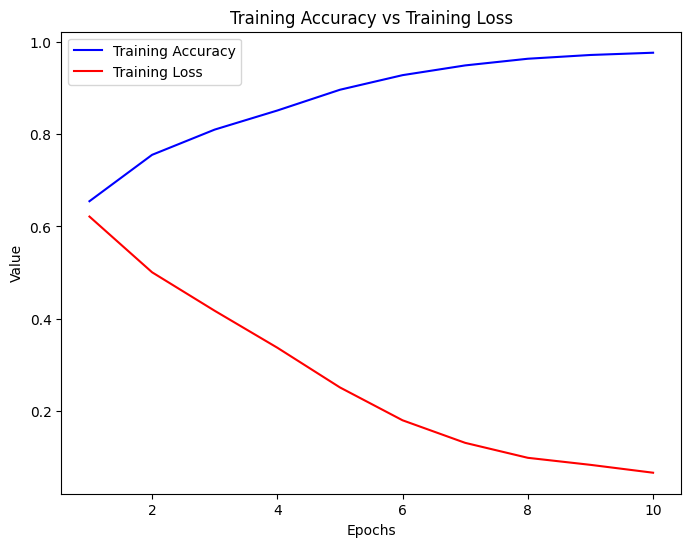

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have the history object from model.fit()
train_acc = history.history['accuracy']
train_loss = history.history['loss']

epochs = range(1, len(train_acc) + 1)

plt.figure(figsize=(8,6))
plt.plot(epochs, train_acc, 'b-', label='Training Accuracy')
plt.plot(epochs, train_loss, 'r-', label='Training Loss')

plt.title('Training Accuracy vs Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    # 1st Convolutional Block
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    # 2nd Convolutional Block
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # 3rd Convolutional Block
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten & Dense Layers
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Helps reduce overfitting
    Dense(1, activation='sigmoid')  # Binary classification (cat vs dog)
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Print the model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)